#### Today Concepts
1. Decision Tree Regressor
2. Random Forest Classifier

### Decision Tree Regressor

Applying boston dataset for Decision tree regressor algorithm

In [1]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
import pandas as pd

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)
C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)


In [6]:
boston_df = pd.DataFrame(data['data'])
boston_df.columns = data['feature_names']
boston_df['target'] = data['target']
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


**is there any missing values?**

In [8]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

**identify the algorithm**

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
boston_df.shape

(506, 14)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = boston_df[boston_df.columns[:-1]]
X.shape

(506, 13)

In [13]:
y = boston_df['target']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [15]:
X_train.shape

(354, 13)

In [16]:
354/506

0.6996047430830039

In [17]:
X_test.shape

(152, 13)

In [18]:
152/506

0.30039525691699603

In [19]:
regModel = DecisionTreeRegressor()
regModel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

**training performance of model**

In [20]:
regModel.score(X_train,y_train)

1.0

**testing performance of model**

In [21]:
regModel.score(X_test,y_test)

0.7537679218960202

In [22]:
import matplotlib.pyplot as plt

In [23]:
from sklearn import tree

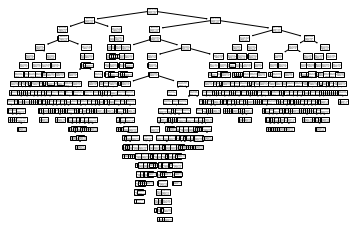

In [24]:
plt.figure()
tree.plot_tree(regModel,feature_names=X.columns)
plt.show()

##### Predict the Revenue of the Reliance Industry by Number of Jio Subscribers

#### 1. get the data

In [25]:
df = pd.read_csv('reliance.csv')
df

,Jio Subscribers,Revenue
0,160.1,8136
1,186.6,8421
2,215.0,10023
3,252.3,11416
4,280.1,12893
5,306.7,14328
6,331.3,15741
7,355.2,16534
8,370.0,17555
9,387.0,18632


In [26]:
df.isna().sum()

Jio Subscribers    0
Revenue            0
dtype: int64

In [28]:
df.shape

(10, 2)

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
X = df[['Jio Subscribers']]
y = df['Revenue']

In [31]:
regModel = DecisionTreeRegressor()
regModel.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [32]:
regModel.score(X,y)

1.0

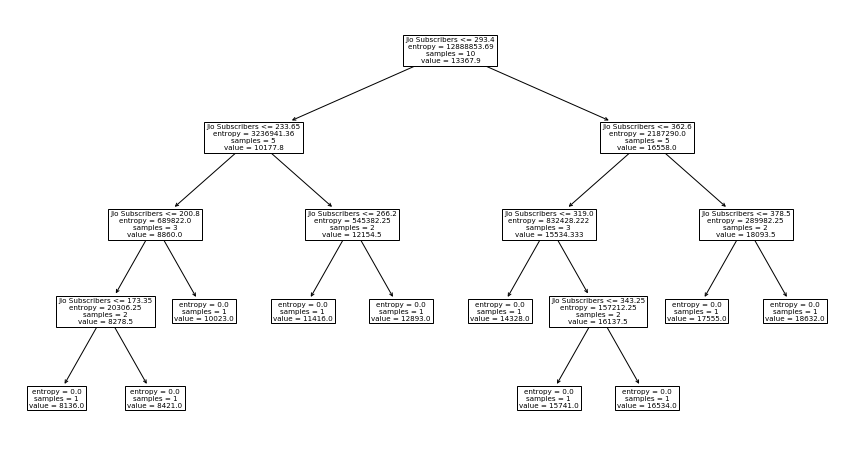

In [37]:
plt.figure(figsize=(15,8))
tree.plot_tree(regModel,feature_names=X.columns)
plt.savefig('download.png',dpi=150)

### Random Forest

Overfitting problem in decision treee



overfitting means

perform well for training data
but fails with unseen/test data


it is the advanced algorithm for decision tree

**Applying iris dataset for random forest**

In [38]:
from sklearn.datasets import load_iris

In [39]:
data = load_iris()

In [40]:
iris_df = pd.DataFrame(data['data'])
iris_df.columns = data['feature_names']
iris_df['target'] = data['target']
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [42]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [43]:
iris_df.shape

(150, 5)

In [45]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [46]:
X = iris_df.drop('target',axis=1)
y = iris_df['target']

In [47]:
X.shape

(150, 4)

In [48]:
y.shape

(150,)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,train_size=0.7
)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
randomModel = RandomForestClassifier()
randomModel.fit(X_train,y_train)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**training performance of model**

In [53]:
randomModel.score(X_train,y_train)

1.0

**testing performace of model**

In [54]:
randomModel.score(X_test,y_test)

0.9333333333333333

**Apply iris data set for decision tree and compare with randomforest**

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
decModel = DecisionTreeClassifier()
decModel.fit(X_train,y_train)
print('training performance')
decModel.score(X_train,y_train)

training performance


1.0

In [57]:
print('testing performance')
decModel.score(X_test,y_test)

testing performance


0.9555555555555556

**Apply breast cancer dataset and compare with random forest and decision tree**

In [58]:
from sklearn.datasets import load_breast_cancer

In [59]:
cancer_data = load_breast_cancer()

In [60]:
cancer_df = pd.DataFrame(cancer_data['data'])
cancer_df.columns = cancer_data['feature_names']
cancer_df['target'] = cancer_data['target']

In [83]:
X = cancer_df.drop('target',axis=1)
y = cancer_df['target']

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [86]:
decModel = DecisionTreeClassifier()
decModel.fit(X_train,y_train)
print('decision tree training score',decModel.score(X_train,y_train))

decision tree training score 1.0


In [87]:
print('decision tree testing score',
      decModel.score(X_test,y_test))

decision tree testing score 0.9239766081871345


In [88]:
randModel = RandomForestClassifier()
randModel.fit(X_train,y_train)
print('random forest training score')
randModel.score(X_train,y_train)

random forest training score


C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [89]:
print('random forest testing score')
randModel.score(X_test,y_test)

random forest testing score


0.9298245614035088

**algorithm giving good permance in training and give more permance in testing**

### Random forest Regressor

In [68]:
reliance_df = pd.read_csv('reliance.csv')

In [69]:
X = reliance_df[['Jio Subscribers']]
y = reliance_df['Revenue']

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
ranReg = RandomForestRegressor()
ranReg.fit(X,y)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
ranReg.score(X,y)

0.9933790448667899

**Predict the Revenue of Reliance for 400Million subscribers**

In [73]:
ranReg.predict([[400]])

array([18314.5])

#### apply boston data set for  Random forest

In [75]:
from sklearn.datasets import load_boston

In [76]:
data = load_boston()

In [77]:
boston_df = pd.DataFrame(data['data'])
boston_df.columns = data['feature_names']
boston_df['target'] = data['target']
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [78]:
X = boston_df.drop('target',axis=1)
y = boston_df['target']


In [79]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,train_size=0.7
)
X_train.shape

(354, 13)

In [80]:
X_test.shape

(152, 13)

In [81]:
randReg = RandomForestRegressor()
randReg.fit(X_train,y_train)
randReg.score(X_train,y_train)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9662627583851332

model.score(Features,y_actual)

accu(y_actual,y_predict)

In [82]:
randReg.score(X_test,y_test)

0.8914070099309044